# Problem Statement: Sentiment Analysis on Hotel Reviews


The Ministry of Tourism in India (MTI) has reached out to my team and I to provide some consultancy aimed at solving a problem. MTI's goal is to improve tourist satisfaction to ensure that they return. My team and I's specific tasks is focused on the hotel industry. We have to develop a sentiment analysis algorithm that processes the reviews from hotels. By analyzing these reviews, we will then be able to offer insights on the cities and hotels that MTI should promote or improve.

Through the following pipeline and the provided data set from the data collection team, I plan to study the analyze text and understand the sentiment behind it.

This pipeline follows a structured plan to ensure that every aspect is covered:

> Pipeline Preparation: Importing Relevant Libraries

> Data Introduction: Loading the Data Sets

> Data Cleaning: Handling Missing Values

> Text Cleaning: Using NLTK to Prep the Text

> Aspect Categorization: Categorizing Reviews Based on Keywords

> Sentiment Analysis: Understanding Emotional Tone in Text

> Data Preprocessing: Encoding Using TF-IDF

> Modeling: Logistic Regression, SVM, Random Forest, LTSM

> Model Selection: Evaluating the Predictive Models

> Exploratory Data Analysis: Analyzing the Distribution of Sentiment

> Hotel Recommendations: Hotel Query Based on User Preferences




### Pipeline Preparation: Importing Relevant Libraries 

In [1]:
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt


In [2]:
nltk.download('punkt')      
nltk.download('stopwords')  
nltk.download('wordnet')  
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Data Introduction: Loading the Data Sets

In [3]:
df = pd.read_csv('hotel_reviews.csv')
df.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...


In [4]:
df.columns

Index(['Index', 'Name', 'Area', 'Review_Date', 'Rating_attribute',
       'Rating(Out of 10)', 'Review_Text'],
      dtype='object')

In [5]:
df.shape

(7001, 7)

In [6]:
df['Name'].nunique()

570

In [7]:
df['Area'].nunique()

31

Our sample dataset incoporate 570 different hotels in 31 different locations around India

### Data Cleaning: Handling Missing Values

In [8]:
df.isnull().sum()

Index                0
Name                 0
Area                 0
Review_Date          0
Rating_attribute     0
Rating(Out of 10)    0
Review_Text          5
dtype: int64

In [9]:
df.dropna(subset=['Review_Text'], inplace=True)

In [10]:
df.duplicated(keep='first').sum()

0

In [11]:
df.isnull().sum()

Index                0
Name                 0
Area                 0
Review_Date          0
Rating_attribute     0
Rating(Out of 10)    0
Review_Text          0
dtype: int64

In [12]:
found_without_delhi = False
for index, row in df.iterrows():
    if 'new delhi' not in row['Area'].lower(): 
        print("Row", index, "does not have New Delhi:", row['Area'])
        found_without_delhi = True

if not found_without_delhi:
    print("All hotels are based in New Delhi")


All hotels are based in New Delhi


In [13]:
df['Area'] = df['Area'].str.replace('new delhi', '', case=False, regex=False).replace(',', '', regex=True)

df['Area'] = df['Area'].str.strip()

### Text Cleaning: Using NLTK to Prep the Text

In [14]:
def text_cleaning(review):
    review = review.lower()
    review = review.translate(str.maketrans('', '', string.punctuation))
    
    tokens = word_tokenize(review)
    
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

In [15]:
df['Cleaned_Reviews'] = df['Review_Text'].apply(text_cleaning)
df['Cleaned_Attributes'] = df['Rating_attribute'].apply(text_cleaning)

df.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text,Cleaned_Reviews,Cleaned_Attributes
0,0,Hotel The Pearl,Paharganj,Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...,hotel pearl perfect place stay delhi paharganj...,best budget friendly hotel
1,1,Hotel The Pearl,Paharganj,Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...,location hotel perfect hotel peaceful nice sta...,amazing place
2,2,Hotel The Pearl,Paharganj,Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food.",location indian food,overall good stay economic
3,3,Hotel The Pearl,Paharganj,Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...,location hotel great next time stay nice room ...,lovely
4,4,Hotel The Pearl,Paharganj,Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...,friendly smiling staff reception staff excelle...,great hotel great staff great staying


### Aspect Categorization: Categorizing Reviews Based on Keywords

In [16]:
aspects = {"Pricing": ["cheap", "expensive", "value", "price", "cost", "budget", "affordable", "worth", "economical",
                               "economic", "low-cost", "charged", "charge", "charging"],
                   "Location": ["location", "area", "where", "place", "situated", "nearby", "proximity", "distance"],
                   "Cleanliness": ["clean", "dirty", "neat", "tidy", "spotless", "messy", "filthy", "sanitary"],
                   "Staff": ["staff", "service", "helpful", "friendly", "rude", "mean", "employees", 
                             "reception", "manager", "personnel", "kind", "disrespectful", "mocking", "insulting" ],
                   "Amenities": ["wifi", "amenities", "pool", "facility", "facilities", "gym", "internet", "equipment"]}

In [17]:
def assigning_aspects(review):
    identified_aspects = {aspect: False for aspect in aspects}
    combined_text = review['Cleaned_Reviews'] + " " + review['Cleaned_Attributes']
    
    words = set(combined_text.split())
    
    for aspect, keywords in aspects.items():
        if any(keyword in words for keyword in keywords):
            identified_aspects[aspect] = True
    
    return identified_aspects

In [18]:
df['Aspects'] = df.apply(assigning_aspects,axis=1)

df[['Review_Text', 'Rating_attribute', 'Aspects']].head()

,Review_Text,Rating_attribute,Aspects
0,Hotel the pearl is perfect place to stay in De...,Best budget friendly hotel,"{'Pricing': True, 'Location': True, 'Cleanline..."
1,Location of the hotel is perfect. The hotel is...,Amazing place,"{'Pricing': False, 'Location': True, 'Cleanlin..."
2,"Location, Indian food.",Overall good stay. Economic.,"{'Pricing': True, 'Location': True, 'Cleanline..."
3,The location and the hotel itself is great. Ne...,Lovely,"{'Pricing': False, 'Location': True, 'Cleanlin..."
4,Friendly and smiling staffs.. The reception st...,Great hotel Great staff and great staying,"{'Pricing': False, 'Location': True, 'Cleanlin..."


### Sentiment Analysis: Understanding Emotional Tone in Text

In [19]:
sia = SentimentIntensityAnalyzer()

In [20]:
def analyze_sentiment(review):
    combined_review = review['Cleaned_Reviews'] + " " + review['Cleaned_Attributes']
    
    sentiment_score = sia.polarity_scores(combined_review)
    return sentiment_score

In [21]:
df['Sentiment'] = df.apply(analyze_sentiment, axis = 1)

df['Compound_Score'] = df['Sentiment'].apply(lambda x: x['compound'])
df['Sentiment_Classification'] = df['Compound_Score'].apply(lambda x: 'positive' if x > 0.5
                                                            else ('negative' if x < 0 else 'neutral'))


df[['Review_Text', 'Rating_attribute', 'Compound_Score', 'Sentiment_Classification']].head()


,Review_Text,Rating_attribute,Compound_Score,Sentiment_Classification
0,Hotel the pearl is perfect place to stay in De...,Best budget friendly hotel,0.9805,positive
1,Location of the hotel is perfect. The hotel is...,Amazing place,0.9690,positive
2,"Location, Indian food.",Overall good stay. Economic.,0.4404,neutral
3,The location and the hotel itself is great. Ne...,Lovely,0.9623,positive
4,Friendly and smiling staffs.. The reception st...,Great hotel Great staff and great staying,0.9893,positive


In [22]:
df['Sentiment_Classification'].value_counts()

positive    4554
neutral     1475
negative     967
Name: Sentiment_Classification, dtype: int64

### Data Preprocessing: Encoding Using TF-IDF

In [23]:
df['Combined_Text'] = df['Cleaned_Reviews'] + " " + df['Cleaned_Attributes']

In [24]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7)

X_tfidf = tfidf_vectorizer.fit_transform(df['Combined_Text'])

In [25]:
y = df['Sentiment_Classification']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

### Modeling: Logistic Regression, SVM, Random Forest, LTSM

#### 1) Logistic Regression

In [26]:
LR = LogisticRegression(random_state=42, max_iter=200)

LR.fit(X_train, y_train)
LR_predictions = LR.predict(X_test)

#### 2) SVM

In [27]:
SVM = SVC(random_state=42)

SVM.fit(X_train, y_train)
SVM_predictions = SVM.predict(X_test)

#### 3) Random Forest

In [28]:
RF = RandomForestClassifier(random_state=42, n_estimators=100)

RF.fit(X_train, y_train)
RF_predictions = RF.predict(X_test)

### Model Selection: Evaluating the Predictive Models

In [29]:
models = ['Logistic Regression', 'SVM', 'Random Forest']
predictions = [LR_predictions, SVM_predictions, RF_predictions]

In [30]:
for model, prediction in zip(models, predictions):
    print(f"{model} Accuracy: {accuracy_score(y_test, prediction)}")
    print(classification_report(y_test, prediction))

Logistic Regression Accuracy: 0.8957142857142857
              precision    recall  f1-score   support

    negative       0.94      0.82      0.87       200
     neutral       0.83      0.69      0.76       283
    positive       0.90      0.97      0.94       917

    accuracy                           0.90      1400
   macro avg       0.89      0.83      0.86      1400
weighted avg       0.89      0.90      0.89      1400

SVM Accuracy: 0.9221428571428572
              precision    recall  f1-score   support

    negative       0.94      0.88      0.91       200
     neutral       0.90      0.75      0.82       283
    positive       0.92      0.98      0.95       917

    accuracy                           0.92      1400
   macro avg       0.92      0.87      0.89      1400
weighted avg       0.92      0.92      0.92      1400

Random Forest Accuracy: 0.9371428571428572
              precision    recall  f1-score   support

    negative       0.95      0.91      0.93       200
    

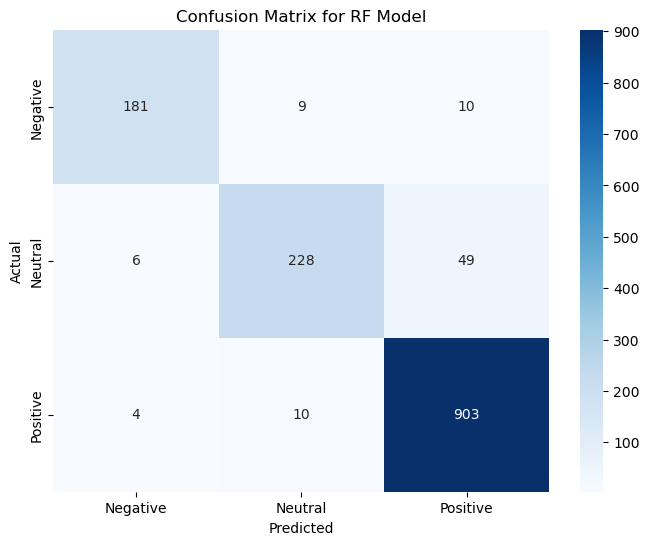

In [31]:
conf_matrix_RF = confusion_matrix(y_test, RF_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix for RF Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


The RF model has the highest overall accuracy and balanced performance across all sentiment categories. It is the best model for this task.

### Exploratory Data Analysis: Analyzing the Distribution of Sentiment

Objectives:
- Understand the distribution of reviews by area.
- Understand how sentiments are distributed across different aspects for each hotel.

#### 1) Distribution of Sentiment by Area

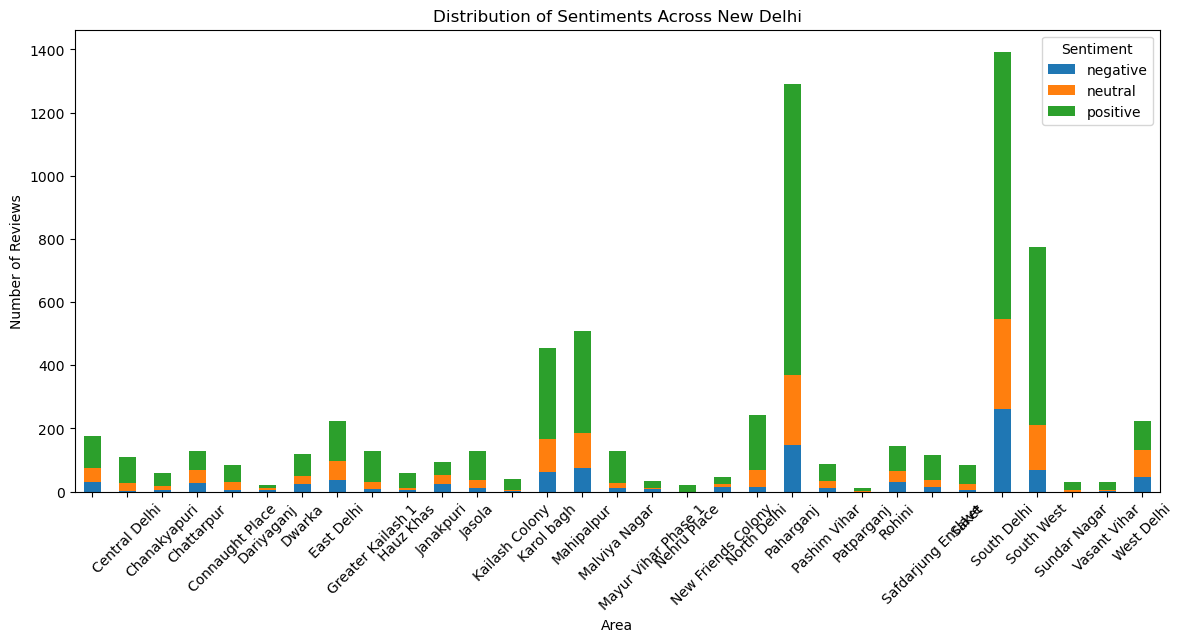

In [32]:
Area_Sentiment = df.groupby(['Area', 'Sentiment_Classification']).size().unstack(fill_value=0)
Area_Sentiment.plot(kind='bar', stacked=True, figsize=(14, 6))

plt.title('Distribution of Sentiments Across New Delhi')
plt.ylabel('Number of Reviews')
plt.xlabel('Area')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')

plt.show()

#### 2) Top 10 Hotels with Positive Reviews per Aspect

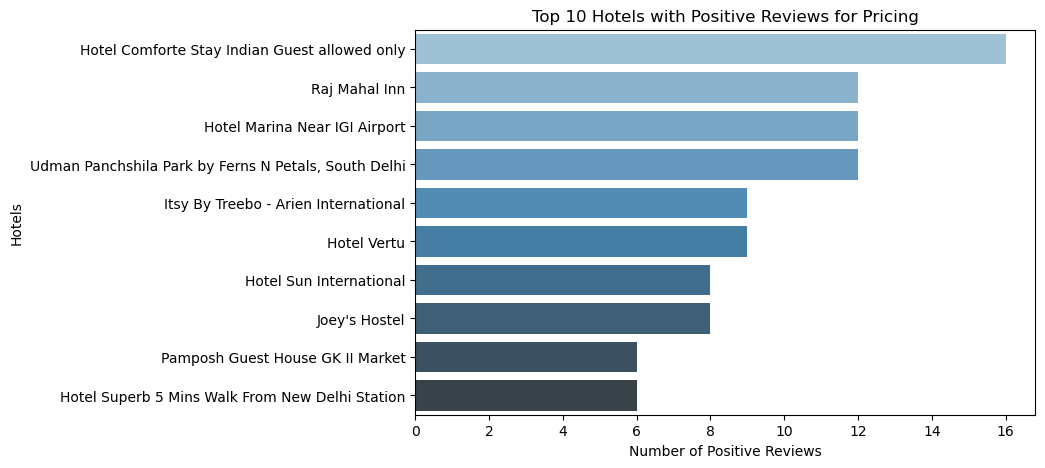

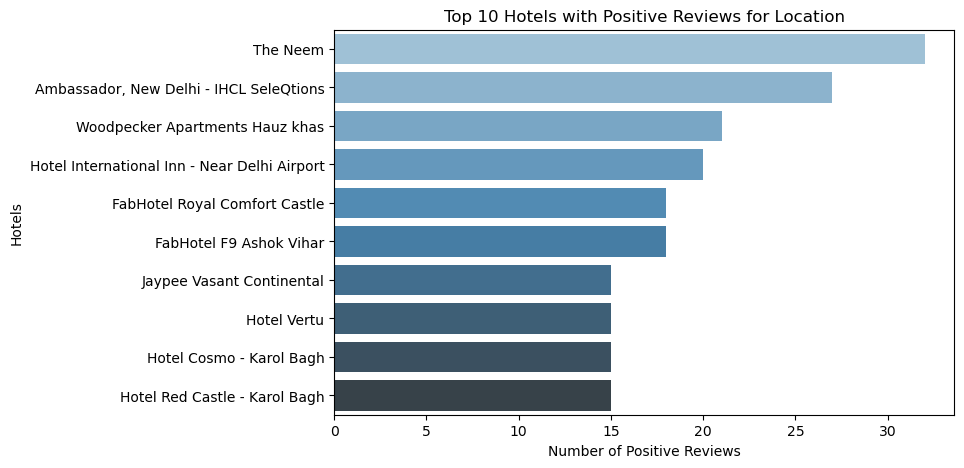

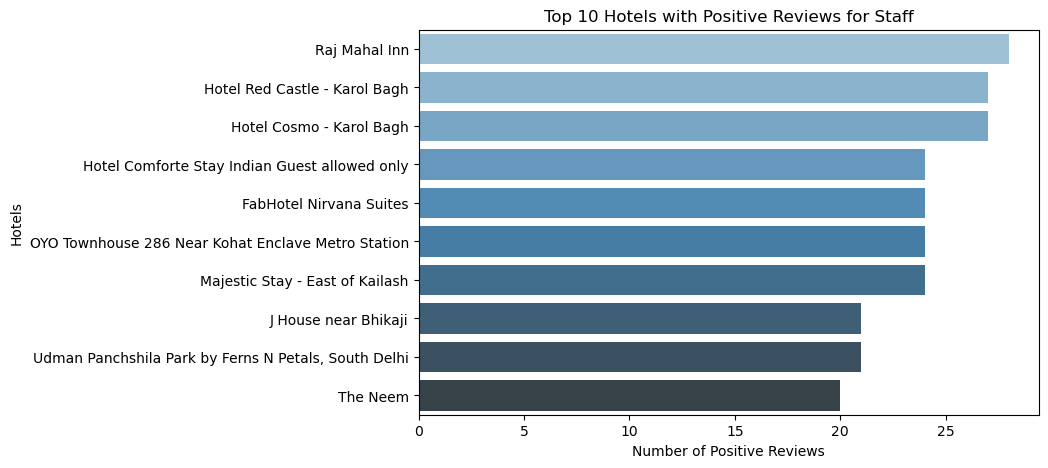

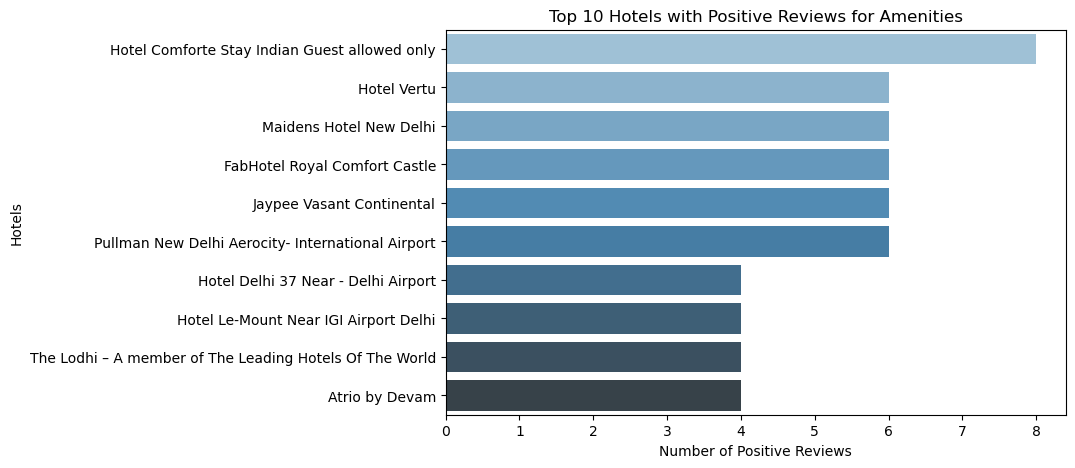

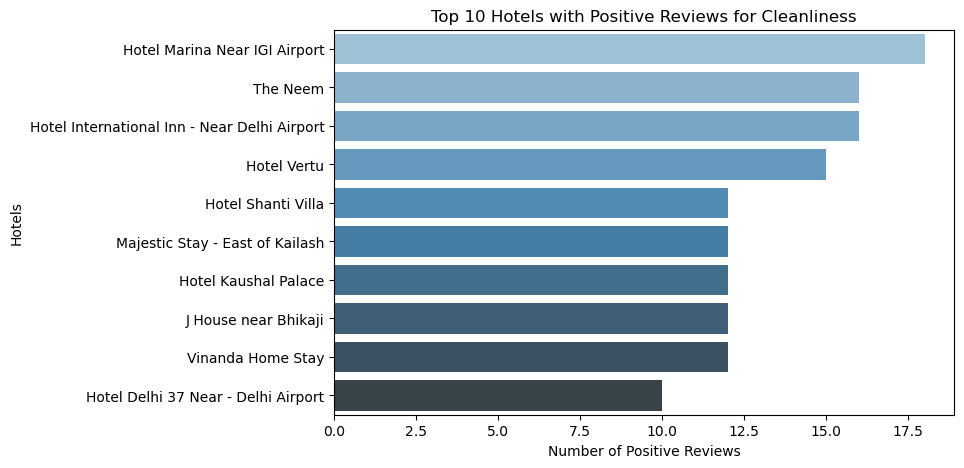

In [33]:
aspects = ["Pricing", "Location", "Staff", "Amenities", "Cleanliness"]

for aspect in aspects:
    plt.figure(figsize=(8, 5))
    
    filter_V1 = df[(df['Sentiment_Classification'] == 'positive') & 
                   (df['Aspects'].apply(lambda x: x.get(aspect, False)))]
    
    hotel_counts = filter_V1['Name'].value_counts().head(10)
    
    sns.barplot(x=hotel_counts.values, y=hotel_counts.index, palette='Blues_d')
    plt.title(f"Top 10 Hotels with Positive Reviews for {aspect}")
    plt.xlabel("Number of Positive Reviews")
    plt.ylabel("Hotels")
    plt.show()

#### 3) Top 10 Hotels with the Most Negative Reviews per Aspect

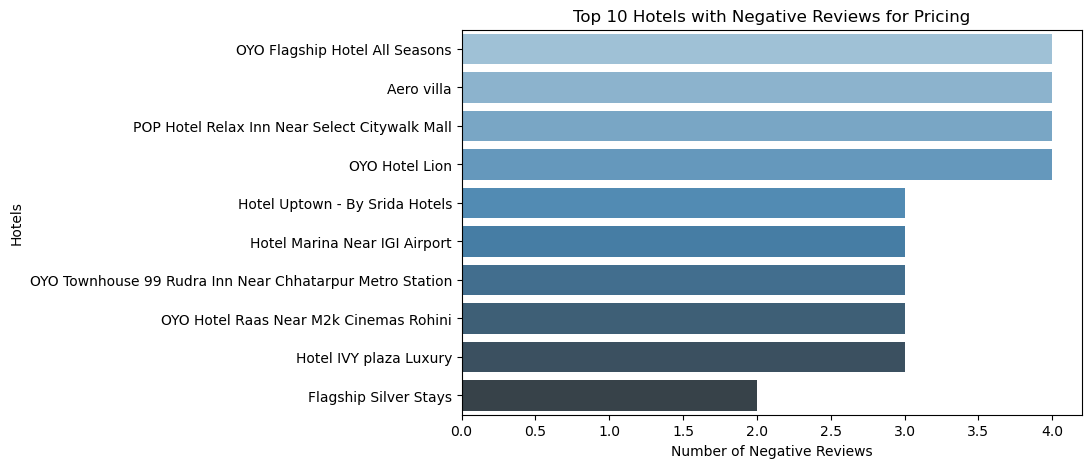

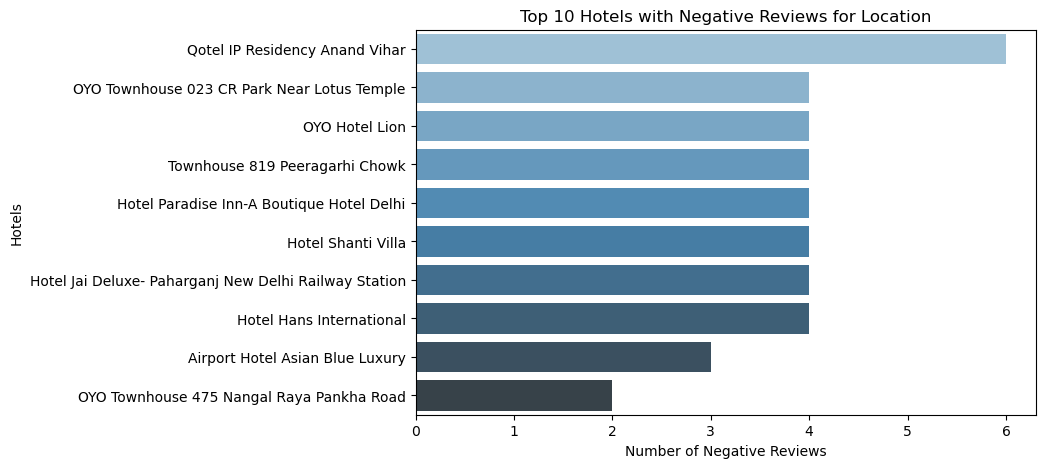

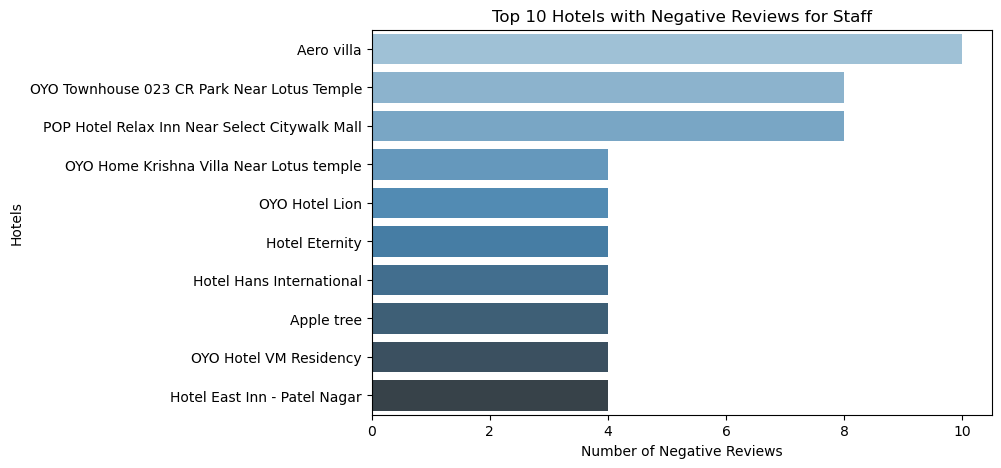

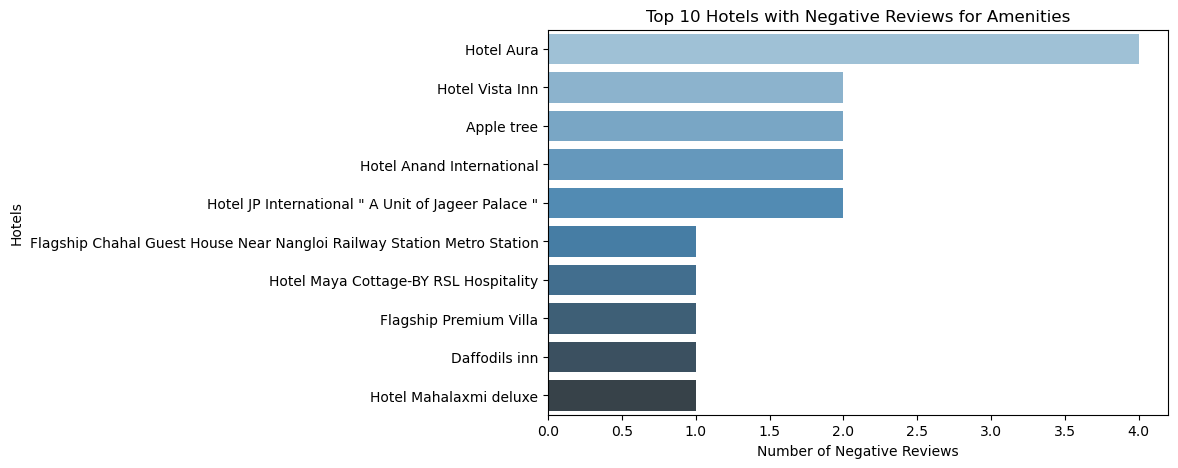

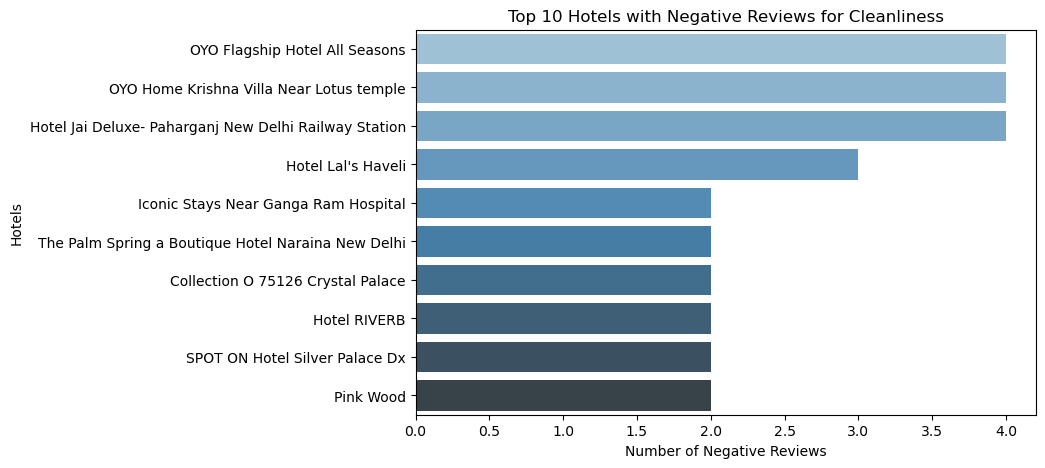

In [48]:
for aspect in aspects:
    plt.figure(figsize=(8, 5))
    
    filter_V1 = df[(df['Sentiment_Classification'] == 'negative') & 
                   (df['Aspects'].apply(lambda x: x.get(aspect, False)))]
    
    hotel_counts = filter_V1['Name'].value_counts().head(10)
    
    sns.barplot(x=hotel_counts.values, y=hotel_counts.index, palette='Blues_d')
    plt.title(f"Top 10 Hotels with Negative Reviews for {aspect}")
    plt.xlabel("Number of Negative Reviews")
    plt.ylabel("Hotels")
    plt.show()

#### 4) Sentiment Distribution across each aspect

In [35]:
aspect_sentiments = {
    'Pricing': {'positive': 0, 'neutral': 0, 'negative': 0},
    'Amenities': {'positive': 0, 'neutral': 0, 'negative': 0},
    'Location': {'positive': 0, 'neutral': 0, 'negative': 0},
    'Staff': {'positive': 0, 'neutral': 0, 'negative': 0},
    'Cleanliness': {'positive': 0, 'neutral': 0, 'negative': 0}
}

In [36]:
def update_aspect_sentiments(row):
    aspects = row['Aspects']  
    sentiment = row['Sentiment_Classification']
    for aspect in aspects:
        if aspects[aspect]:  
            aspect_sentiments[aspect][sentiment] += 1

# Apply the function to each row in the DataFrame
df.apply(update_aspect_sentiments, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
6996    None
6997    None
6998    None
6999    None
7000    None
Length: 6996, dtype: object

In [37]:
print(aspect_sentiments)

{'Pricing': {'positive': 630, 'neutral': 110, 'negative': 101}, 'Amenities': {'positive': 288, 'neutral': 50, 'negative': 32}, 'Location': {'positive': 1632, 'neutral': 313, 'negative': 139}, 'Staff': {'positive': 2481, 'neutral': 290, 'negative': 197}, 'Cleanliness': {'positive': 1020, 'neutral': 47, 'negative': 77}}


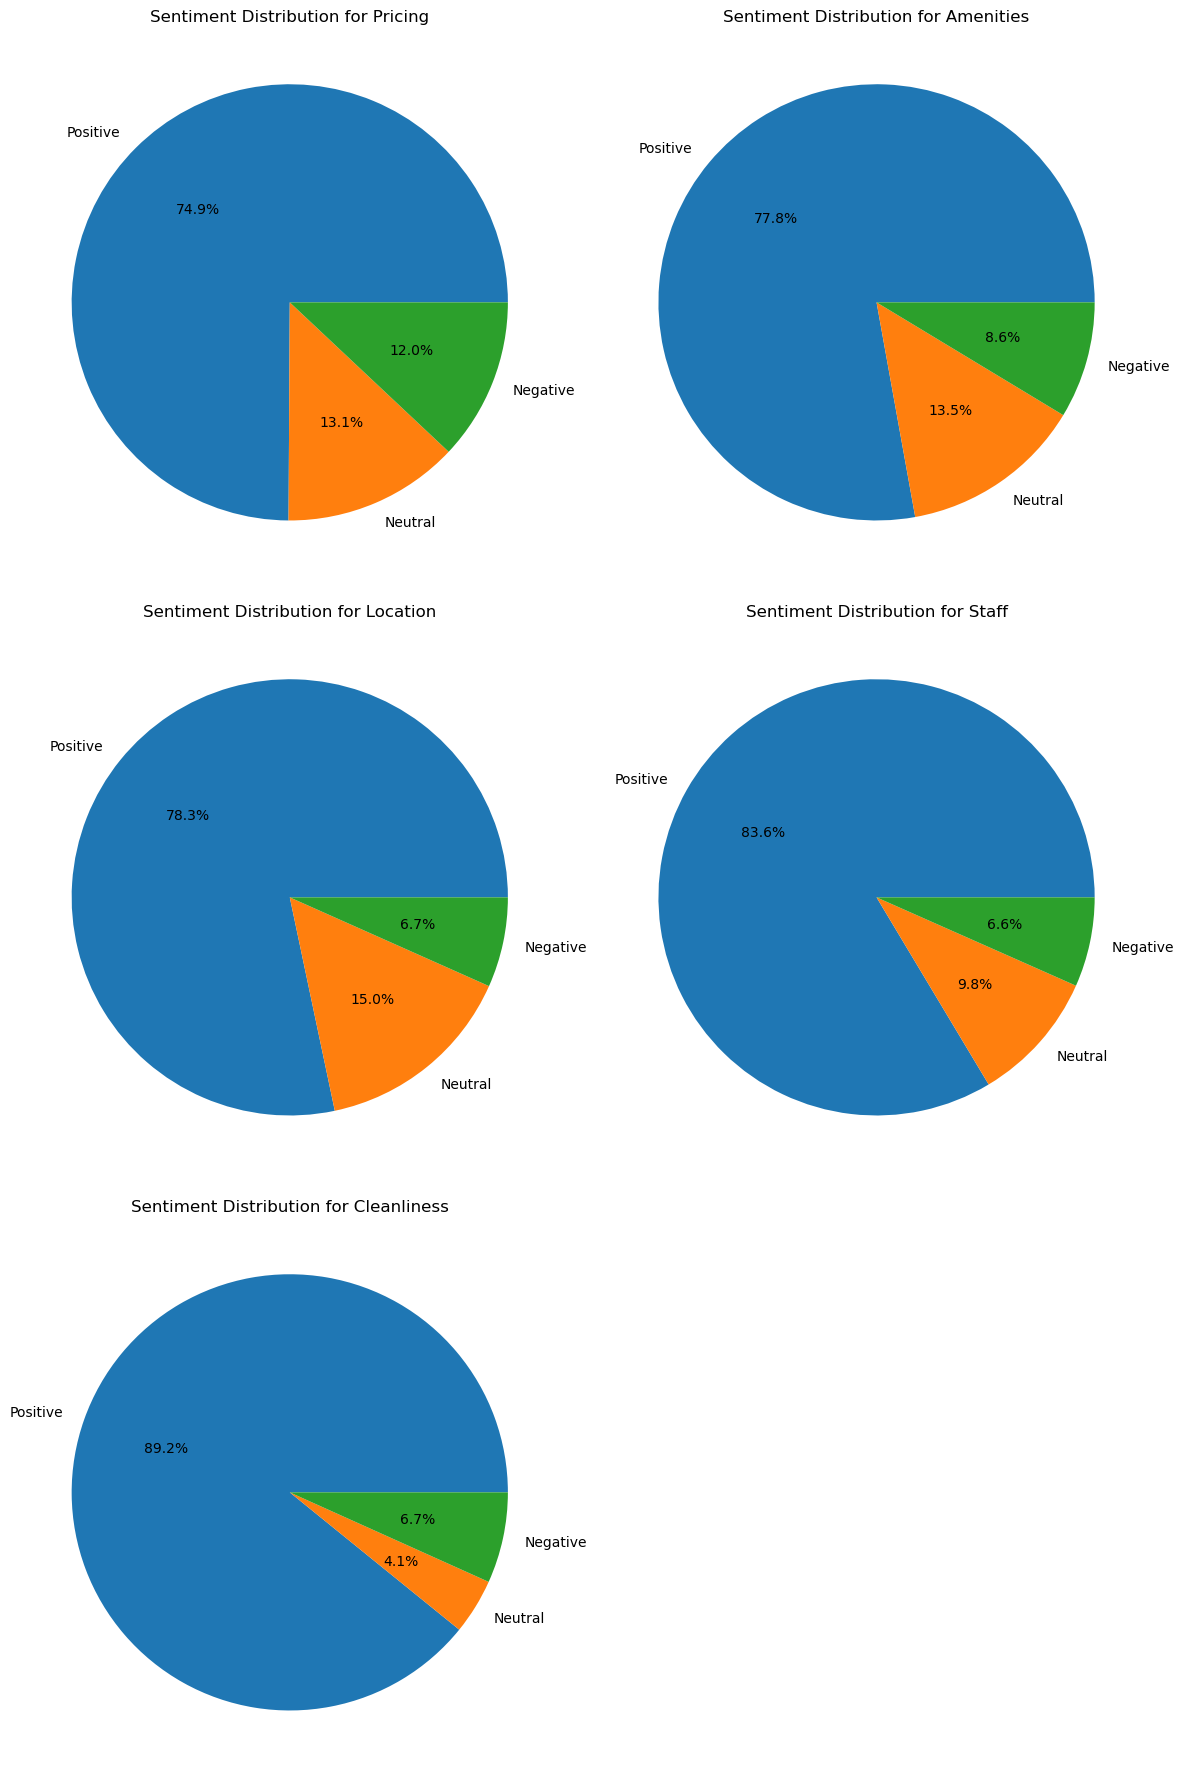

In [38]:
fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # Adjust layout to fit all pie charts
axes = axes.flatten()

for i, (aspect, sentiments) in enumerate(aspect_sentiments.items()):
    sentiment_pie = [sentiments['positive'], sentiments['neutral'], sentiments['negative']]
    Labels = ['Positive', 'Neutral', 'Negative']
    axes[i].pie(sentiment_pie, labels=Labels, autopct='%1.1f%%')
    axes[i].set_title(f'Sentiment Distribution for {aspect}')

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


### Hotel Recommendations: Hotel Query Based on User Preferences

In [39]:
def Input_Function():
    available_aspects = ["pricing", "location", "staff", "amenities", "cleanliness"]
    available_sentiments = ["positive", "negative", "neutral"]

    sentiment_INPUT = input("Please choose one sentiment classification (Positive, Negative, Neutral): ").strip().lower()
    if sentiment_INPUT not in available_sentiments:
        print("Invalid sentiment input. Please choose from Positive, Negative, or Neutral.")
        return None, None, None
    
    aspect_INPUT = input("""Please choose the aspect(s) you're prioritizing: Pricing, Location, Staff,
                        Amenities, Cleanliness (note: if you chose more than 1, seperate them with a ",")""").strip().lower()
    if aspect_INPUT in ["none", "no", ""]:
        aspect_INPUT = []
    else:
        aspect_INPUT = [aspect.strip() for aspect in aspect_INPUT.split(",") if aspect.strip() in available_aspects]

    area_INPUT = input("Where in New Delhi would you like to stay?").strip().lower()
    if area_INPUT in ["none", "no", ""]:
        area_INPUT = None

    return sentiment_INPUT, aspect_INPUT, area_INPUT


In [40]:
def filter_function(sentiment_INPUT, aspect_INPUT, area_INPUT):
    filtered_df = df[df['Sentiment_Classification'] == sentiment_INPUT]

    if aspect_INPUT:
        for aspect in aspect_INPUT:
            filtered_df = filtered_df[filtered_df['Aspects'].apply(lambda x: x.get(aspect.capitalize(), False))]
    
    if area_INPUT:
        filtered_df = filtered_df[filtered_df['Area'].str.contains(area_INPUT, case=False)]
    
    filtered_df['Aspects'] = filtered_df['Aspects'].apply(lambda x: str(x))
    
    if not filtered_df.empty:
        print("\nHere are some hotels that match your criteria:\n")
        
        df_columns = ['Name', 'Area', 'Sentiment_Classification', 'Aspects', 'Rating_attribute', 'Review_Text']
        pd.set_option('display.max_colwidth', None)
        display(filtered_df[df_columns].drop_duplicates().head())
        
    else:
        print("\nNo hotels match your criteria. Please try again with different filters.")
        
        

In [47]:
x = input("Do you want to start the search? (yes or no)").strip().lower()

if x == "yes":
    sentiment_input, aspect_input, area_input = Input_Function()

    if sentiment_input:
        filter_function(sentiment_input, aspect_input, area_input)


Do you want to start the search? (yes or no)yes
Please choose one sentiment classification (Positive, Negative, Neutral): neutral
Please choose the aspect(s) you're prioritizing: Pricing, Location, Staff,
                        Amenities, Cleanliness (note: if you chose more than 1, seperate them with a ",")amenities
Where in New Delhi would you like to stay?

Here are some hotels that match your criteria:



,Name,Area,Sentiment_Classification,Aspects,Rating_attribute,Review_Text
65,Novotel New Delhi Aerocity- International Airport,South West,neutral,"{'Pricing': False, 'Location': True, 'Cleanliness': False, 'Staff': False, 'Amenities': True}",Good,"Location, swimming pool,"
189,Hotel International Inn - Near Delhi Airport,Mahipalpur,neutral,"{'Pricing': True, 'Location': False, 'Cleanliness': True, 'Staff': True, 'Amenities': True}",Good,"The reception faces the main road and is as shown on your booking.com page. After checking in, I was taken thru a back door, into a passage, with a lot of mysterious twists and turns, finally entering another building !!\nI was asked to make the payment there at that counter. This counter was of another hotel (Classic, I think) and that opened into the alley behind Hotel International Inn. \nSo to that extent I felt cheated. \nThe interiors were shoddy. The room was spacious, but with old furniture, TV...slow Wi-Fi. The only thing is favour was the room was clean.\nAnd the food was frightfully expensive!! absolutely 3-4 star rates."
231,Hotel Star Villa - Budget Friendly,Paharganj,neutral,"{'Pricing': False, 'Location': False, 'Cleanliness': False, 'Staff': True, 'Amenities': True}",Travel for work and wifi not working!,Staff are very good!
419,Hotel Red Castle - Karol Bagh,Karol bagh,neutral,"{'Pricing': True, 'Location': True, 'Cleanliness': False, 'Staff': False, 'Amenities': True}",Accomodation price is higher than of its competitor of similar facilities,Location
819,Hindustan by Backpackers Heaven Near New Delhi Railway Station,Paharganj,neutral,"{'Pricing': False, 'Location': False, 'Cleanliness': False, 'Staff': False, 'Amenities': True}",Very good,"Facilities, Property and Rooms"
